In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import math
import numpy as np

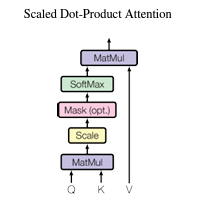

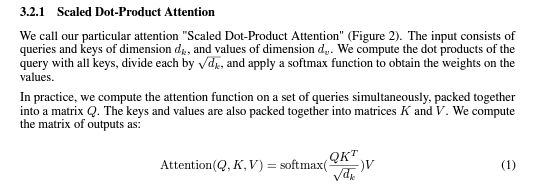

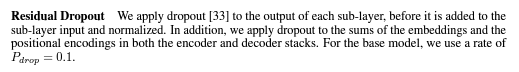

In [2]:
class ScaledDotProductAttention(nn.Module):
    def __init__(self, dropout=0.1):
        super(ScaledDotProductAttention, self).__init__()

        self.dropout = nn.Dropout(dropout)

    def forward_pass(self, query, key, value, mask=None):
        # 1) Q has dimensions (# of queries) x d, while K has dimensions (# of keys) x d
        #    so we must transpose K before matmul
        # 2) divide by sqrt of query dimension
        # 3) apply mask (opt.)
        # 4) softmax
        # 5) matmul w/ V
        scores = torch.matmul(query, key.transpose(-2, -1)) / math.sqrt(query.size(-1))

        if mask is not None:
          scores = scores.masked_fill(mask == 0, -1e9)

        attention = F.softmax(scores, dim=-1)

        attention = self.dropout(attention)

        return torch.matmul(attention, value), attention

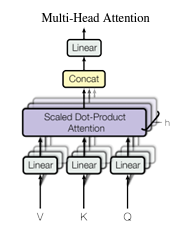

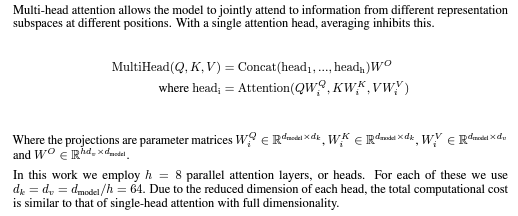



In [3]:
class MultiHeadAttention(nn.Module):
  def __init__(self, d_model, num_heads, dropout=0.1):
    # d_model = dimension of input embeddings
    # num_heads = number of attention heads (8 in the paper)

    super(MultiHeadAttention, self).__init__()

    self.d_model = d_model
    self.num_heads = num_heads

    # d_kv = key/value dimension (as specified in paper)
    # each head works on a lower-dimensional subspace of the full input
    self.d_kv = d_model // num_heads

    # Linear transformations for queries, values, and keys
    self.linear_q = nn.Linear(d_model, d_model)
    self.linear_k = nn.Linear(d_model, d_model)
    self.linear_v = nn.Linear(d_model, d_model)

    self.scaled_dot_product_attention = ScaledDotProductAttention(dropout)

    self.linear_concat = nn.Linear(d_model, d_model)
    self.dropout = nn.Dropout(dropout)

    def forward_pass(self, query, key, value, mask=one, key_padding_mask=None):
      batch_size = query.size(0)

      # Apply linear transformations and reshape
      query = self.linear_q(query).view(batch_size, -1, self.num_heads, self.d_kv).transpose(1,2)
      key = self.linear_k(key).view(batch_size, -1, self.num_heads, self.d_kv).transpose(1,2)
      value = self.linear_v(value).view(batch_size, -1, self.num_heads, self.d_kv).transpose(1,2)
